In [1]:
import pandas as pd
import pickle
import numpy as np


In [2]:

df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,1,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,1,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,1,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()


venue
Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

In [6]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])


In [7]:
df['city'] = cities

In [8]:

df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo


In [11]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [12]:
df = df[df['city'].isin(eligible_cities)]

In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo


In [14]:
import pandas as pd

df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

df['current_score'] = df.groupby('match_id')['runs'].cumsum()


C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2465862390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2465862390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [15]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [16]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [17]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_10364\562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [18]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [19]:
import pandas as pd
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)
cumulative_dismissed = df.groupby('match_id')['player_dismissed'].cumsum()
df['player_dismissed'] = cumulative_dismissed
df['wickets_left'] = 10 - df['player_dismissed']
df


C:\Users\HP\AppData\Local\Temp\ipykernel_10364\1503408301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_10364\1503408301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = cumulative_dismissed
C:\Users\HP\AppData\Local\Temp\ipykernel_10364\1503408301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [20]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']
df

C:\Users\HP\AppData\Local\Temp\ipykernel_10364\1226876470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


C:\Users\HP\AppData\Local\Temp\ipykernel_10364\898028464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score'] * 6) / df['balls_bowled'].where(df['balls_bowled'] != 0, 1)


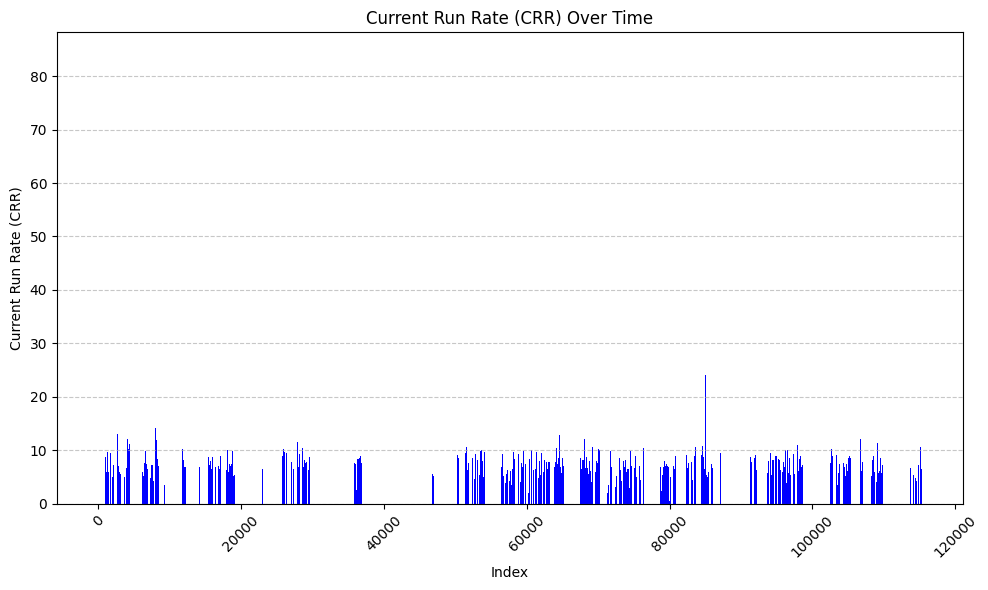

In [21]:
import matplotlib.pyplot as plt
df['crr'] = (df['current_score'] * 6) / df['balls_bowled'].where(df['balls_bowled'] != 0, 1)
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['crr'], color='blue')
plt.xlabel('Index')
plt.ylabel('Current Run Rate (CRR)')
plt.title('Current Run Rate (CRR) Over Time')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


In [22]:
import numpy as np
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
groups = df.groupby('match_id')
last_five = []
for match_id in df['match_id'].unique():
    match_df = groups.get_group(match_id)
    rolling_sum = match_df['runs'].rolling(window=5, min_periods=1).sum()
    last_five.extend(rolling_sum.values.tolist())


C:\Users\HP\AppData\Local\Temp\ipykernel_10364\2064861230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')


In [23]:
df['last_five'] = last_five

C:\Users\HP\AppData\Local\Temp\ipykernel_10364\1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [24]:
last_five

[0.0,
 0.0,
 1.0,
 3.0,
 3.0,
 6.0,
 6.0,
 6.0,
 4.0,
 4.0,
 5.0,
 7.0,
 7.0,
 8.0,
 8.0,
 4.0,
 6.0,
 5.0,
 4.0,
 5.0,
 6.0,
 3.0,
 7.0,
 8.0,
 10.0,
 12.0,
 15.0,
 15.0,
 15.0,
 13.0,
 11.0,
 8.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 7.0,
 8.0,
 8.0,
 10.0,
 10.0,
 6.0,
 5.0,
 5.0,
 3.0,
 2.0,
 2.0,
 2.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 4.0,
 3.0,
 3.0,
 8.0,
 10.0,
 8.0,
 9.0,
 10.0,
 5.0,
 3.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 12.0,
 14.0,
 15.0,
 12.0,
 12.0,
 8.0,
 6.0,
 6.0,
 7.0,
 12.0,
 12.0,
 15.0,
 14.0,
 14.0,
 9.0,
 8.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 8.0,
 7.0,
 5.0,
 4.0,
 7.0,
 5.0,
 7.0,
 8.0,
 8.0,
 6.0,
 10.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 8.0,
 9.0,
 8.0,
 12.0,
 12.0,
 7.0,
 6.0,
 10.0,
 7.0,
 7.0,
 6.0,
 10.0,
 7.0,
 7.0,
 10.0,
 10.0,
 6.0,
 9.0,
 8.0,
 8.0,
 9.0,
 13.0,
 11.0,
 17.0,
 14.0,
 17.0,
 14.0,
 14.0,
 8.0,

In [25]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,0.0
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,0.0
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,1.0
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,3.0
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,4.0
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,3.0
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,2.0
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,3.0


In [26]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')


In [27]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [28]:
final_df.dropna(inplace=True)

In [29]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,0.0,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,0.0,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,1.0,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,3.0,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,3.0,168
...,...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256,4.0,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932,3.0,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521,2.0,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000,3.0,128


In [30]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [31]:
final_df = final_df.sample(final_df.shape[0])

In [32]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
42842,Australia,South Africa,Adelaide,4,117,10,8.000000,4.0,144
43329,England,South Africa,Cape Town,132,0,2,6.600000,6.0,134
8205,New Zealand,India,Hamilton,208,1,6,10.487395,8.0,212
27879,New Zealand,Sri Lanka,Lauderhill,84,31,5,5.662921,5.0,120
42898,Australia,South Africa,Adelaide,57,63,7,6.000000,3.0,144
...,...,...,...,...,...,...,...,...,...
37874,South Africa,Australia,Centurion,32,89,8,6.193548,5.0,128
45187,England,Pakistan,Dubai,0,119,10,0.000000,0.0,172
17750,New Zealand,Pakistan,Cape Town,105,29,5,6.923077,10.0,143
9475,Pakistan,Australia,Sydney,36,86,8,6.352941,2.0,107


In [33]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
34553,South Africa,India,Johannesburg,66,76,9,9.000000,7.0,219
2207,New Zealand,Australia,Auckland,191,29,8,12.593407,24.0,243


In [34]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,0.0
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,0.0
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,1.0
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,3.0
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,4.0
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,3.0
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,2.0
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,3.0


In [35]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
45601,New Zealand,Sri Lanka,Mount Maunganui,67,78,10,9.571429,4.0
47424,Pakistan,India,Kolkata,55,53,8,4.925373,3.0
29733,Australia,India,Sydney,135,27,8,8.709677,4.0
18504,New Zealand,South Africa,Johannesburg,129,0,3,6.396694,4.0
24304,South Africa,Afghanistan,Barbados,105,25,5,6.631579,9.0
...,...,...,...,...,...,...,...,...
7580,Bangladesh,West Indies,St Kitts,141,3,1,7.230769,4.0
13868,South Africa,England,Cape Town,90,54,8,8.181818,4.0
33037,Pakistan,India,Colombo,67,53,5,6.000000,5.0
24723,Australia,India,Barbados,17,100,10,5.100000,3.0


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [37]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')


In [38]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [39]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9647624217789629
2.447026856523164


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error: 2.447026856523164


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


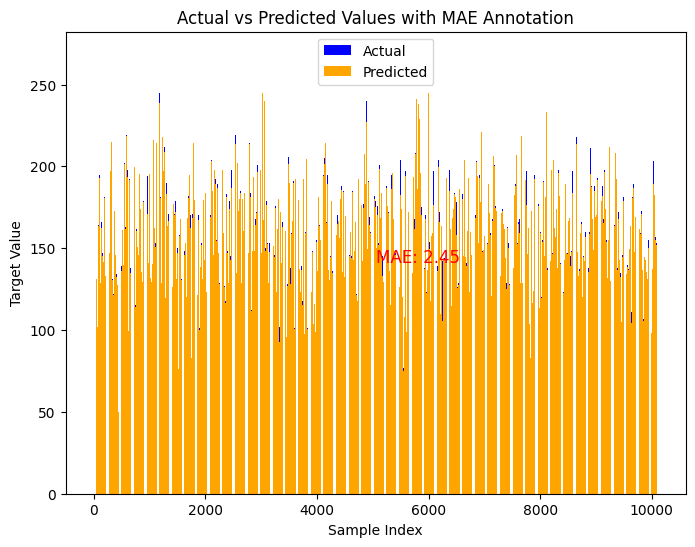

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
plt.figure(figsize=(8, 6))
plt.bar(range(len(y_test)), y_test, color='blue', label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='orange', label='Predicted')
plt.text(0.5, 0.5, f'MAE: {mae:.2f}', color='red', fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values with MAE Annotation')
plt.legend()
plt.show()


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


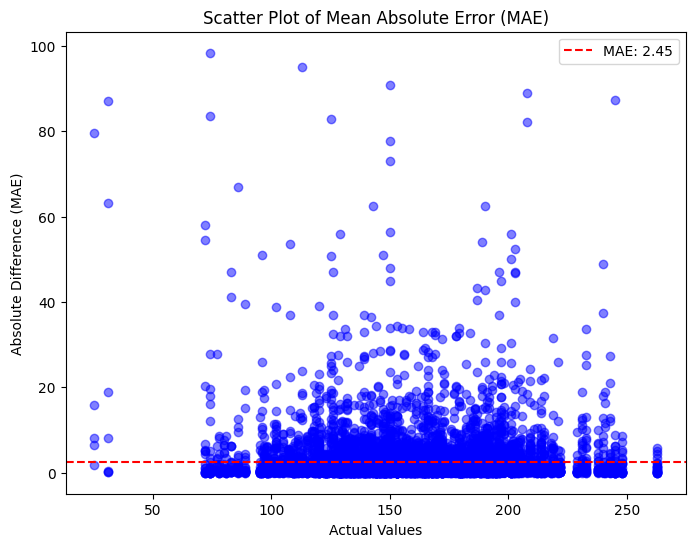

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, abs(y_test - y_pred), color='blue', alpha=0.5)
plt.axhline(y=mae, color='red', linestyle='--', label=f'MAE: {mae:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Absolute Difference (MAE)')
plt.title('Scatter Plot of Mean Absolute Error (MAE)')
plt.legend()
plt.show()


In [42]:
pickle.dump(pipe,open('pipe.pkl','wb'))


In [43]:
import xgboost
xgboost.__version__

'2.0.3'